# System Comparison at One Year Time Delta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import asdf
import numpy as np
from numpy.typing import NDArray
import pandas as pd
from datetime import datetime, timedelta

In [2]:
import surtseygeotherm as sgt

In [3]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.precision', 3)

In [4]:
pltt = sbn.color_palette([c['color'] for c in plt.rcParams['axes.prop_cycle']])
pltt

[(0.0, 0.18823529411764706, 0.43529411764705883),
 (0.0, 0.6235294117647059, 0.5058823529411764),
 (0.6431372549019608, 0.00392156862745098, 0.13333333333333333),
 (1.0, 0.43137254901960786, 0.22745098039215686),
 (0.5176470588235295, 0.0, 0.803921568627451),
 (0.0, 0.5529411764705883, 0.9764705882352941),
 (0.0, 0.5843137254901961, 0.011764705882352941),
 (0.0, 0.7607843137254902, 0.9764705882352941),
 (0.8862745098039215, 0.00392156862745098, 0.20392156862745098),
 (1.0, 0.7647058823529411, 0.23137254901960785)]

## Access Data

In [5]:
sgt.records_from_timespan('2018-07-30', '2018-08-03', 'df')

start_time            end_time            record
25 2018-07-26 14:05:33.750 2018-07-30 11:45:18  Surtsey-A-023-25
26 2018-07-30 14:28:49.250 2018-08-01 09:40:04  Surtsey-A-024-26
27 2018-08-01 12:08:41.000 2018-08-03 09:36:56  Surtsey-A-025-27

In [6]:
sgt.records_from_timespan('2019-07-30', '2019-08-03', 'df')

start_time            end_time             record
161 2019-07-29 14:46:01.000 2019-07-31 10:33:02  Surtsey-A-155-161
162 2019-07-31 13:29:48.250 2019-08-02 09:53:26  Surtsey-A-156-162
163 2019-08-02 13:58:40.000 2019-08-05 09:52:32  Surtsey-A-157-163

There is good 'overlap' for records 'A-024' and 'A-156'

In [7]:
cols = sgt.Columns.DEFAULT
rec18 = "Surtsey-A-024-26"
rec19 = "Surtsey-A-156-162"

data18 = sgt.get_record(
    rec18, 'df', columns=cols, time_is_index=True, time_is_datetime=True)
data19 = sgt.get_record(
    rec19, 'df', columns=cols, time_is_index=True, time_is_datetime=True)

In [8]:
cjccols = ('t',) + sgt.Columns.ALL[-5:-1]
cjccols

('t', 'CJC03', 'CJC47', 'CJC811', 'CJC1215')

In [9]:
cjc18 = sgt.get_record(
    rec18, 'df', columns=cjccols, time_is_index=True, time_is_datetime=True)
cjc19 = sgt.get_record(
    rec19, 'df', columns=cjccols, time_is_index=True, time_is_datetime=True)

In [10]:
data18.index[[0, -1]]

DatetimeIndex(['2018-07-30 14:28:49.625000', '2018-08-01 09:40:02.625000'], dtype='datetime64[us]', name='t', freq=None)

In [11]:
data19.index[[0, -1]]

DatetimeIndex(['2019-07-31 13:29:48.625000', '2019-08-02 09:53:24.625000'], dtype='datetime64[us]', name='t', freq=None)

### Select Exactly a 1 Year Time Difference

In [12]:
sel18 = data18.loc[data18.index >= data19.index[0] - np.timedelta64(365, 'D')]
sel18.head()

masscln      T0      T1      T2      T3  ...     T11  \
t                                                                 ...           
2018-07-31 13:29:48.625    9.922  39.418  40.547  37.316  43.817  ...  43.188   
2018-07-31 13:29:49.625    9.922  39.422  40.558  37.311  43.813  ...  43.180   
2018-07-31 13:29:50.625    9.922  39.427  40.557  37.309  43.815  ...  43.179   
2018-07-31 13:29:51.625    9.922  39.427  40.567  37.294  43.815  ...  43.180   
2018-07-31 13:29:52.625    9.922  39.415  40.583  37.303  43.808  ...  43.184   

                            T12     T13     T14     T15  
t                                                        
2018-07-31 13:29:48.625  39.039  47.130  34.228  42.324  
2018-07-31 13:29:49.625  39.029  47.118  34.222  42.309  
2018-07-31 13:29:50.625  39.034  47.121  34.230  42.315  
2018-07-31 13:29:51.625  39.040  47.115  34.224  42.318  
2018-07-31 13:29:52.625  39.036  47.115  34.233  42.314  

[5 rows x 17 columns]

In [13]:
sel19 = data19[data19.index - np.timedelta64(365, 'D') <= data18.index[-1]]
sel19.head()

masscln      T0      T1      T2      T3  ...     T11  \
t                                                                 ...           
2019-07-31 13:29:48.625    0.288  43.502  43.887  39.248  49.050  ...  48.906   
2019-07-31 13:29:49.625    0.288  43.504  43.881  39.239  49.052  ...  48.910   
2019-07-31 13:29:50.625    0.288  43.506  43.878  39.240  49.041  ...  48.897   
2019-07-31 13:29:51.625    0.288  43.492  43.866  39.242  49.048  ...  48.894   
2019-07-31 13:29:52.625    0.289  43.490  43.856  39.242  49.048  ...  48.889   

                            T12     T13     T14     T15  
t                                                        
2019-07-31 13:29:48.625  41.837  52.419  35.017  47.275  
2019-07-31 13:29:49.625  41.834  52.433  35.013  47.264  
2019-07-31 13:29:50.625  41.829  52.431  35.018  47.263  
2019-07-31 13:29:51.625  41.826  52.424  35.009  47.272  
2019-07-31 13:29:52.625  41.829  52.431  35.010  47.261  

[5 rows x 17 columns]

CJC channels for both years

In [14]:
selcjc18 = cjc18.loc[sel18.index]
selcjc18.head()

CJC03   CJC47  CJC811  CJC1215
t                                                       
2018-07-31 13:29:48.625  33.531  33.734    34.0   33.863
2018-07-31 13:29:49.625  33.539  33.742    34.0   33.848
2018-07-31 13:29:50.625  33.539  33.742    34.0   33.844
2018-07-31 13:29:51.625  33.531  33.727    34.0   33.844
2018-07-31 13:29:52.625  33.531  33.719    34.0   33.844

In [15]:
selcjc19 = cjc19.loc[sel19.index]
selcjc19.head()

CJC03   CJC47  CJC811  CJC1215
t                                                       
2019-07-31 13:29:48.625  34.187  34.215  34.562   34.437
2019-07-31 13:29:49.625  34.187  34.219  34.562   34.429
2019-07-31 13:29:50.625  34.187  34.219  34.562   34.422
2019-07-31 13:29:51.625  34.187  34.219  34.562   34.422
2019-07-31 13:29:52.625  34.187  34.219  34.562   34.422

In [16]:
hpf = asdf.open(sgt.dataloc / "heatingperiods.asdf", mode='rw')
hpf.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.2.0
├─history (dict)
│ ├─entries (list)
│ │ ├─[0] (HistoryEntry) ...
│ │ ├─[1] (HistoryEntry) ...
│ │ ├─[2] (HistoryEntry) ...
│ │ ├─[3] (HistoryEntry) ...
│ │ ├─[4] (HistoryEntry) ...
│ │ └─[5] (HistoryEntry) ...
│ └─extensions (list)
│   └─[0] (ExtensionMetadata) ...
└─records (dict)
  ├─Surtsey-A-023-25 (dict) ...
  ├─Surtsey-A-024-26 (dict) ...
  ├─Surtsey-A-025-27 (dict) ...
  ├─Surtsey-A-155-161 (dict) ...
  ├─Surtsey-A-156-162 (dict) ...
  └─Surtsey-A-157-163 (dict) ...
Some nodes not shown.


In [17]:
ref18 = hpf['records'][rec18]
ref19 = hpf['records'][rec19]

In [18]:
dt = ref19['datetime'][0] - ref18['datetime'][0]
dt

datetime.timedelta(days=365, seconds=85236)

In [19]:
ref18.keys()

dict_keys(['datetime', 'mass', 'start_dt', 't', 'timedep'])

In [20]:
ref18['timedep']['parameter-names']

['a0', 'f0', 'f2', 'md1', 'dt1', 'dt2', 'pw', 'rate', 'm0']

In [21]:
pars18 = ref18['timedep']['parameters']
pars19 = ref19['timedep']['parameters']

In [22]:
evrate18 = pars18[:, -2]
evrate19 = pars19[:, -2]

### Evaporation Compensation

In [23]:
t18 = sel18.index
corr18 = - np.asarray((t18[0] - t18) / 1e6, dtype=float) * evrate18.mean()
t19 = sel19.index - np.timedelta64(365, 'D')
corr19 = - np.asarray((t19[0] - t19) / 1e6, dtype=float) * evrate19.mean()

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, layout='constrained')

ax1.plot(
    t18, sel18.masscln - sel18.masscln[sel18.index[0]] + corr18,
    label='2018', color=pltt[0], ls='solid'
)
ax1.plot(
    t19, sel19.masscln - sel19.masscln[sel19.index[0]] + corr19,
    label='2019', color=pltt[2], ls='solid'
)
ax1.set(ylabel=r'$\Delta m\ /\ \mathrm{kg}$', ylim=(-.025, .15))
ax1.legend(loc='upper left', ncols=2)
ax2.plot(t18, sel18.loc[:, 'T4'], label='T4:2018',
         color=pltt[0], ls='dotted')
ax2.plot(t18, sel18.loc[:, 'T9'],
         label='T9:2018', color=pltt[0], ls='dashed')
ax2.plot(t19, sel19.loc[:, 'T4'], label='T4:2019',
         color=pltt[2], ls='dotted')
ax2.plot(t19, sel19.loc[:, 'T9'],
         label='T9:2019', color=pltt[2], ls='dashed')
ax2.set(
    xlabel=r'$t\ /\ \mathrm{s}$', ylabel=r'$T\ /\ \mathrm{^\circ C}$'
)
for label in ax2.get_xticklabels(which='major'):
    label.set(rotation=30, ha='right')
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -.25), ncols=6)
fig.set_size_inches(8.5, 8.5)

In [25]:
cols1 = [f"T{i}" for i in (0, 8, 4, 12, 2, 10, 6, 14)]

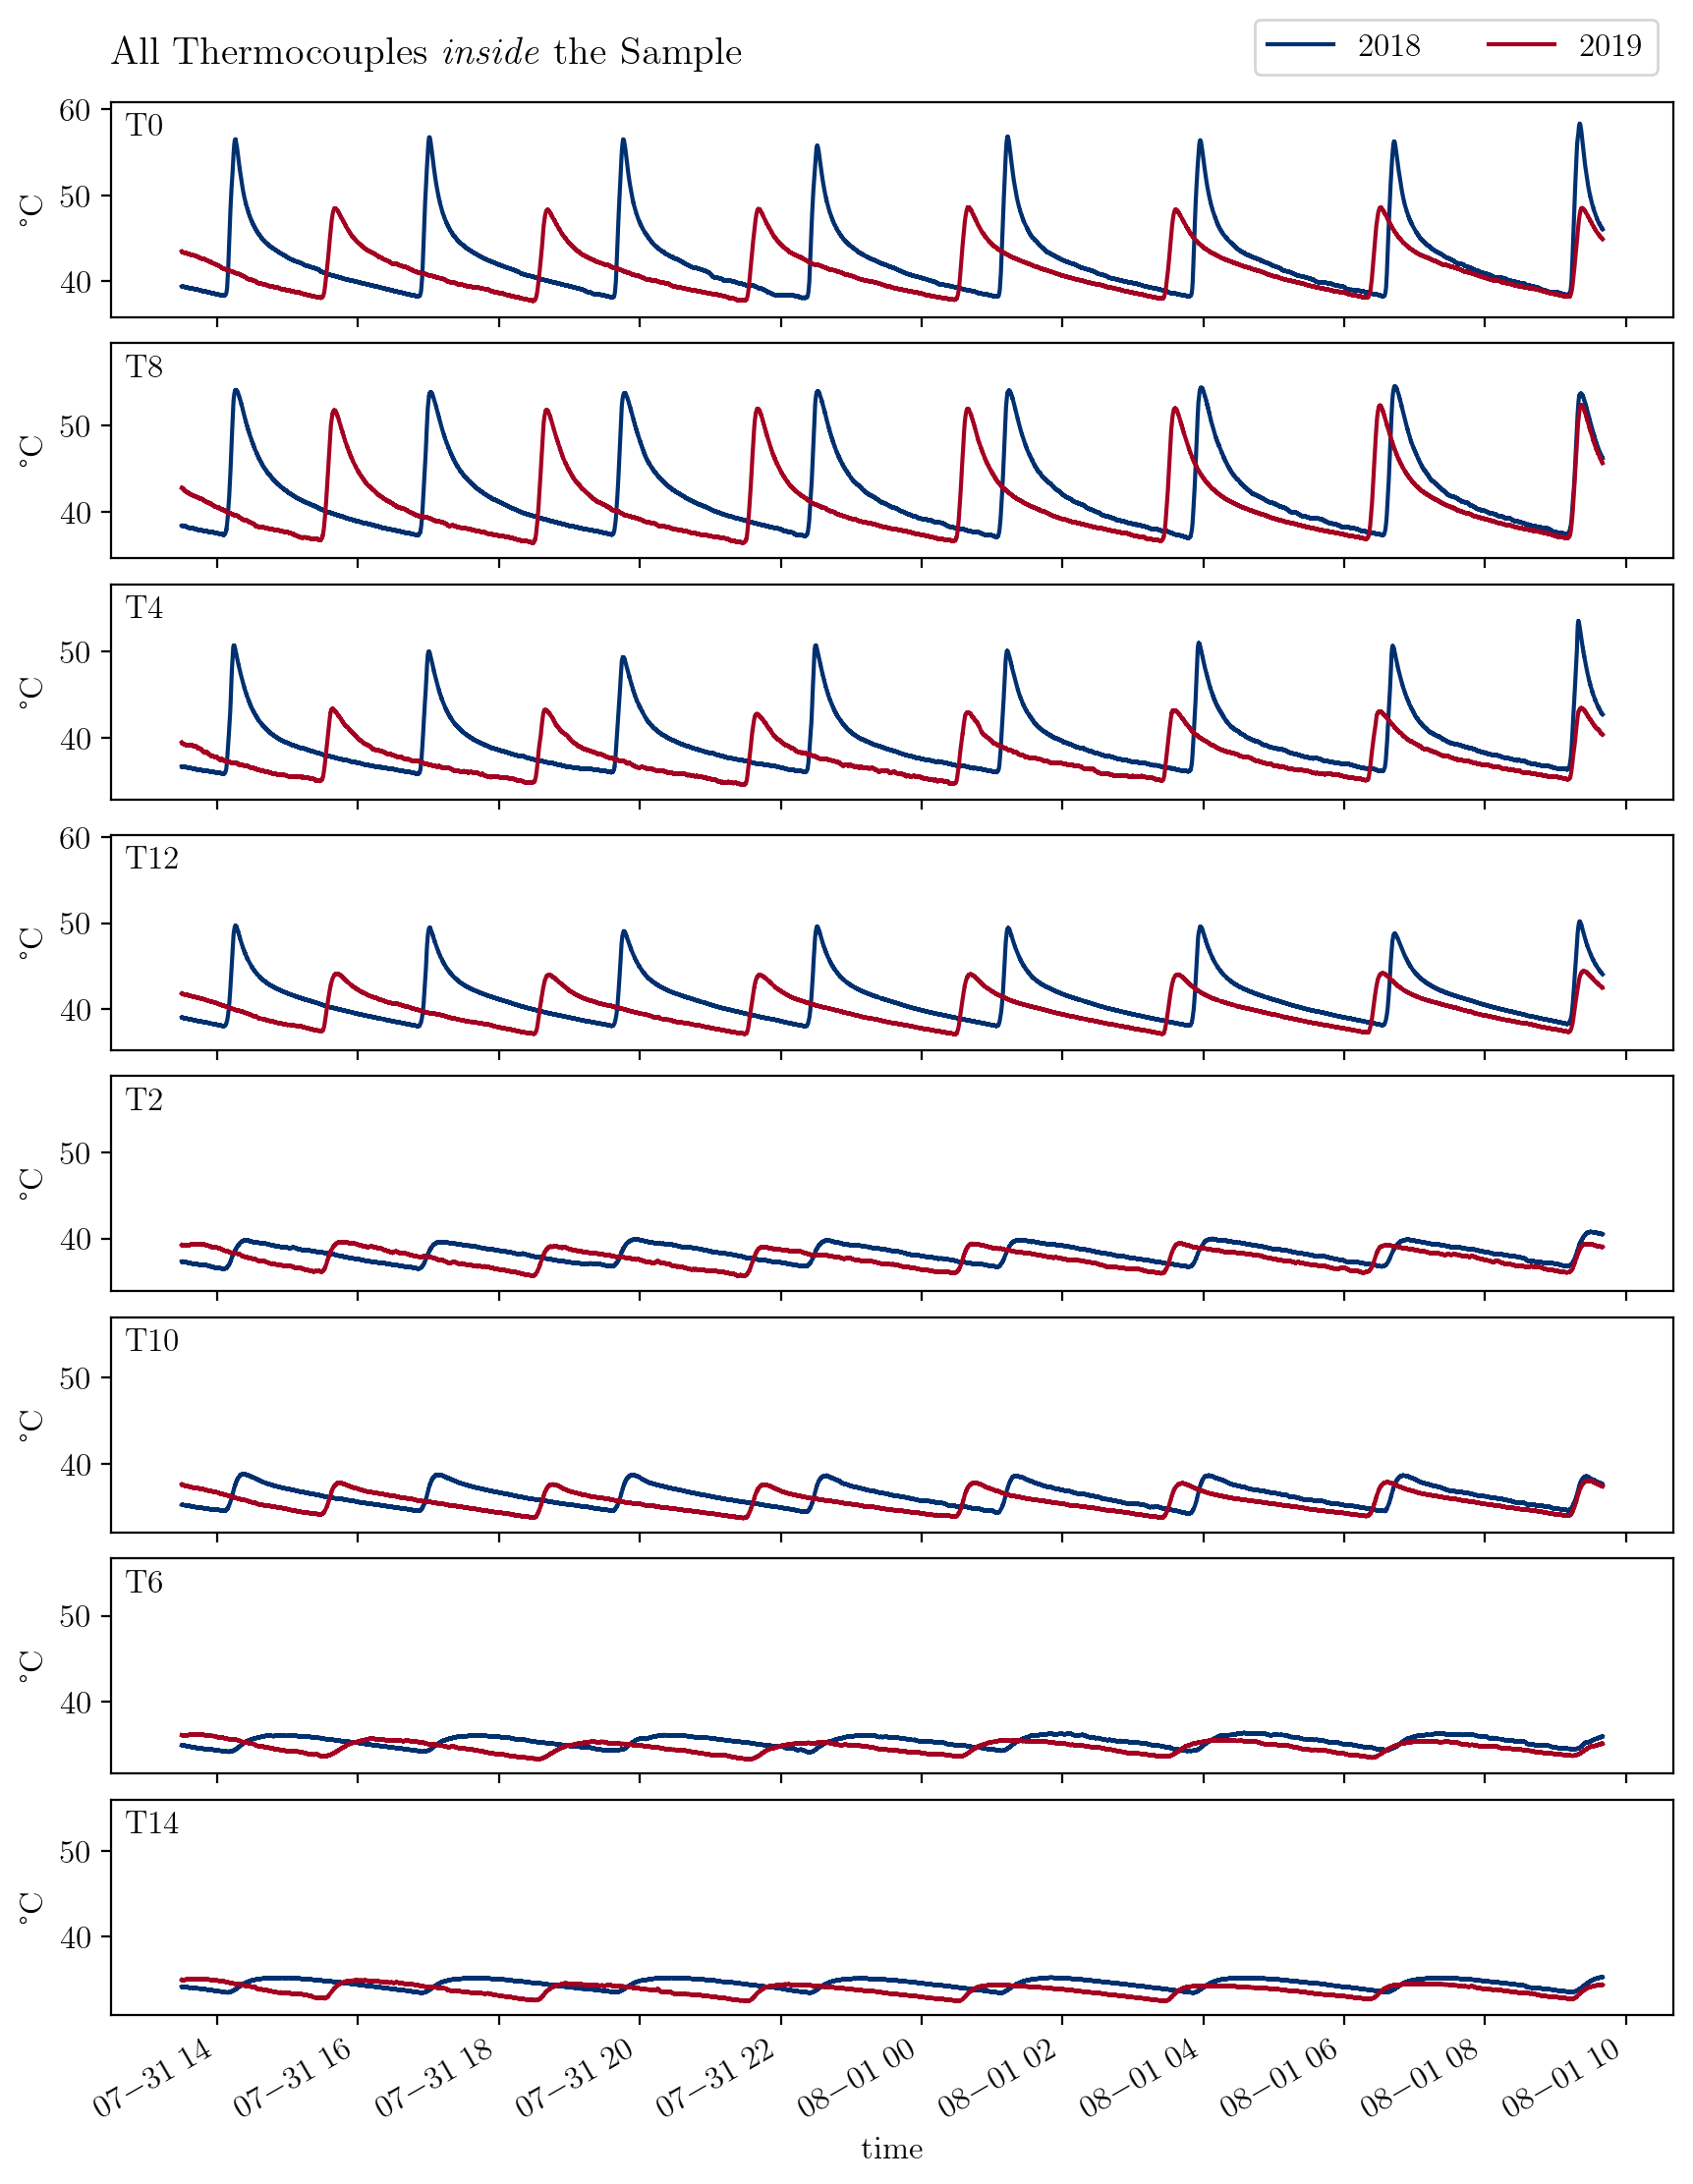

In [26]:
fig, axs = plt.subplots(nrows=8, sharex=True, layout='constrained')

for ax, col in zip(axs, cols1):
    ax.text(.01, .95, col, ha='left', va='top', color='k', transform=ax.transAxes)
    ax.plot(t18, sel18[col].values, color=pltt[0], label="2018")
    ax.plot(t19, sel19[col].values, color=pltt[2], label="2019")
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    mn = 0.95 * sel19[col].min()
    ax.set(ylim=(mn, mn + 25), ylabel='°C')
axs[0].legend(ncols=2, loc='lower right', bbox_to_anchor=(1, 1.05))
axs[0].set_title(r"All Thermocouples \textit{inside} the Sample", loc='left', y=1.1)
axs[-1].set(xlabel="time")
fig.set_size_inches(8.5, 11)

In [27]:
cols2 = [f"T{i}" for i in (1, 9, 5, 13, 3, 11, 7, 15)]

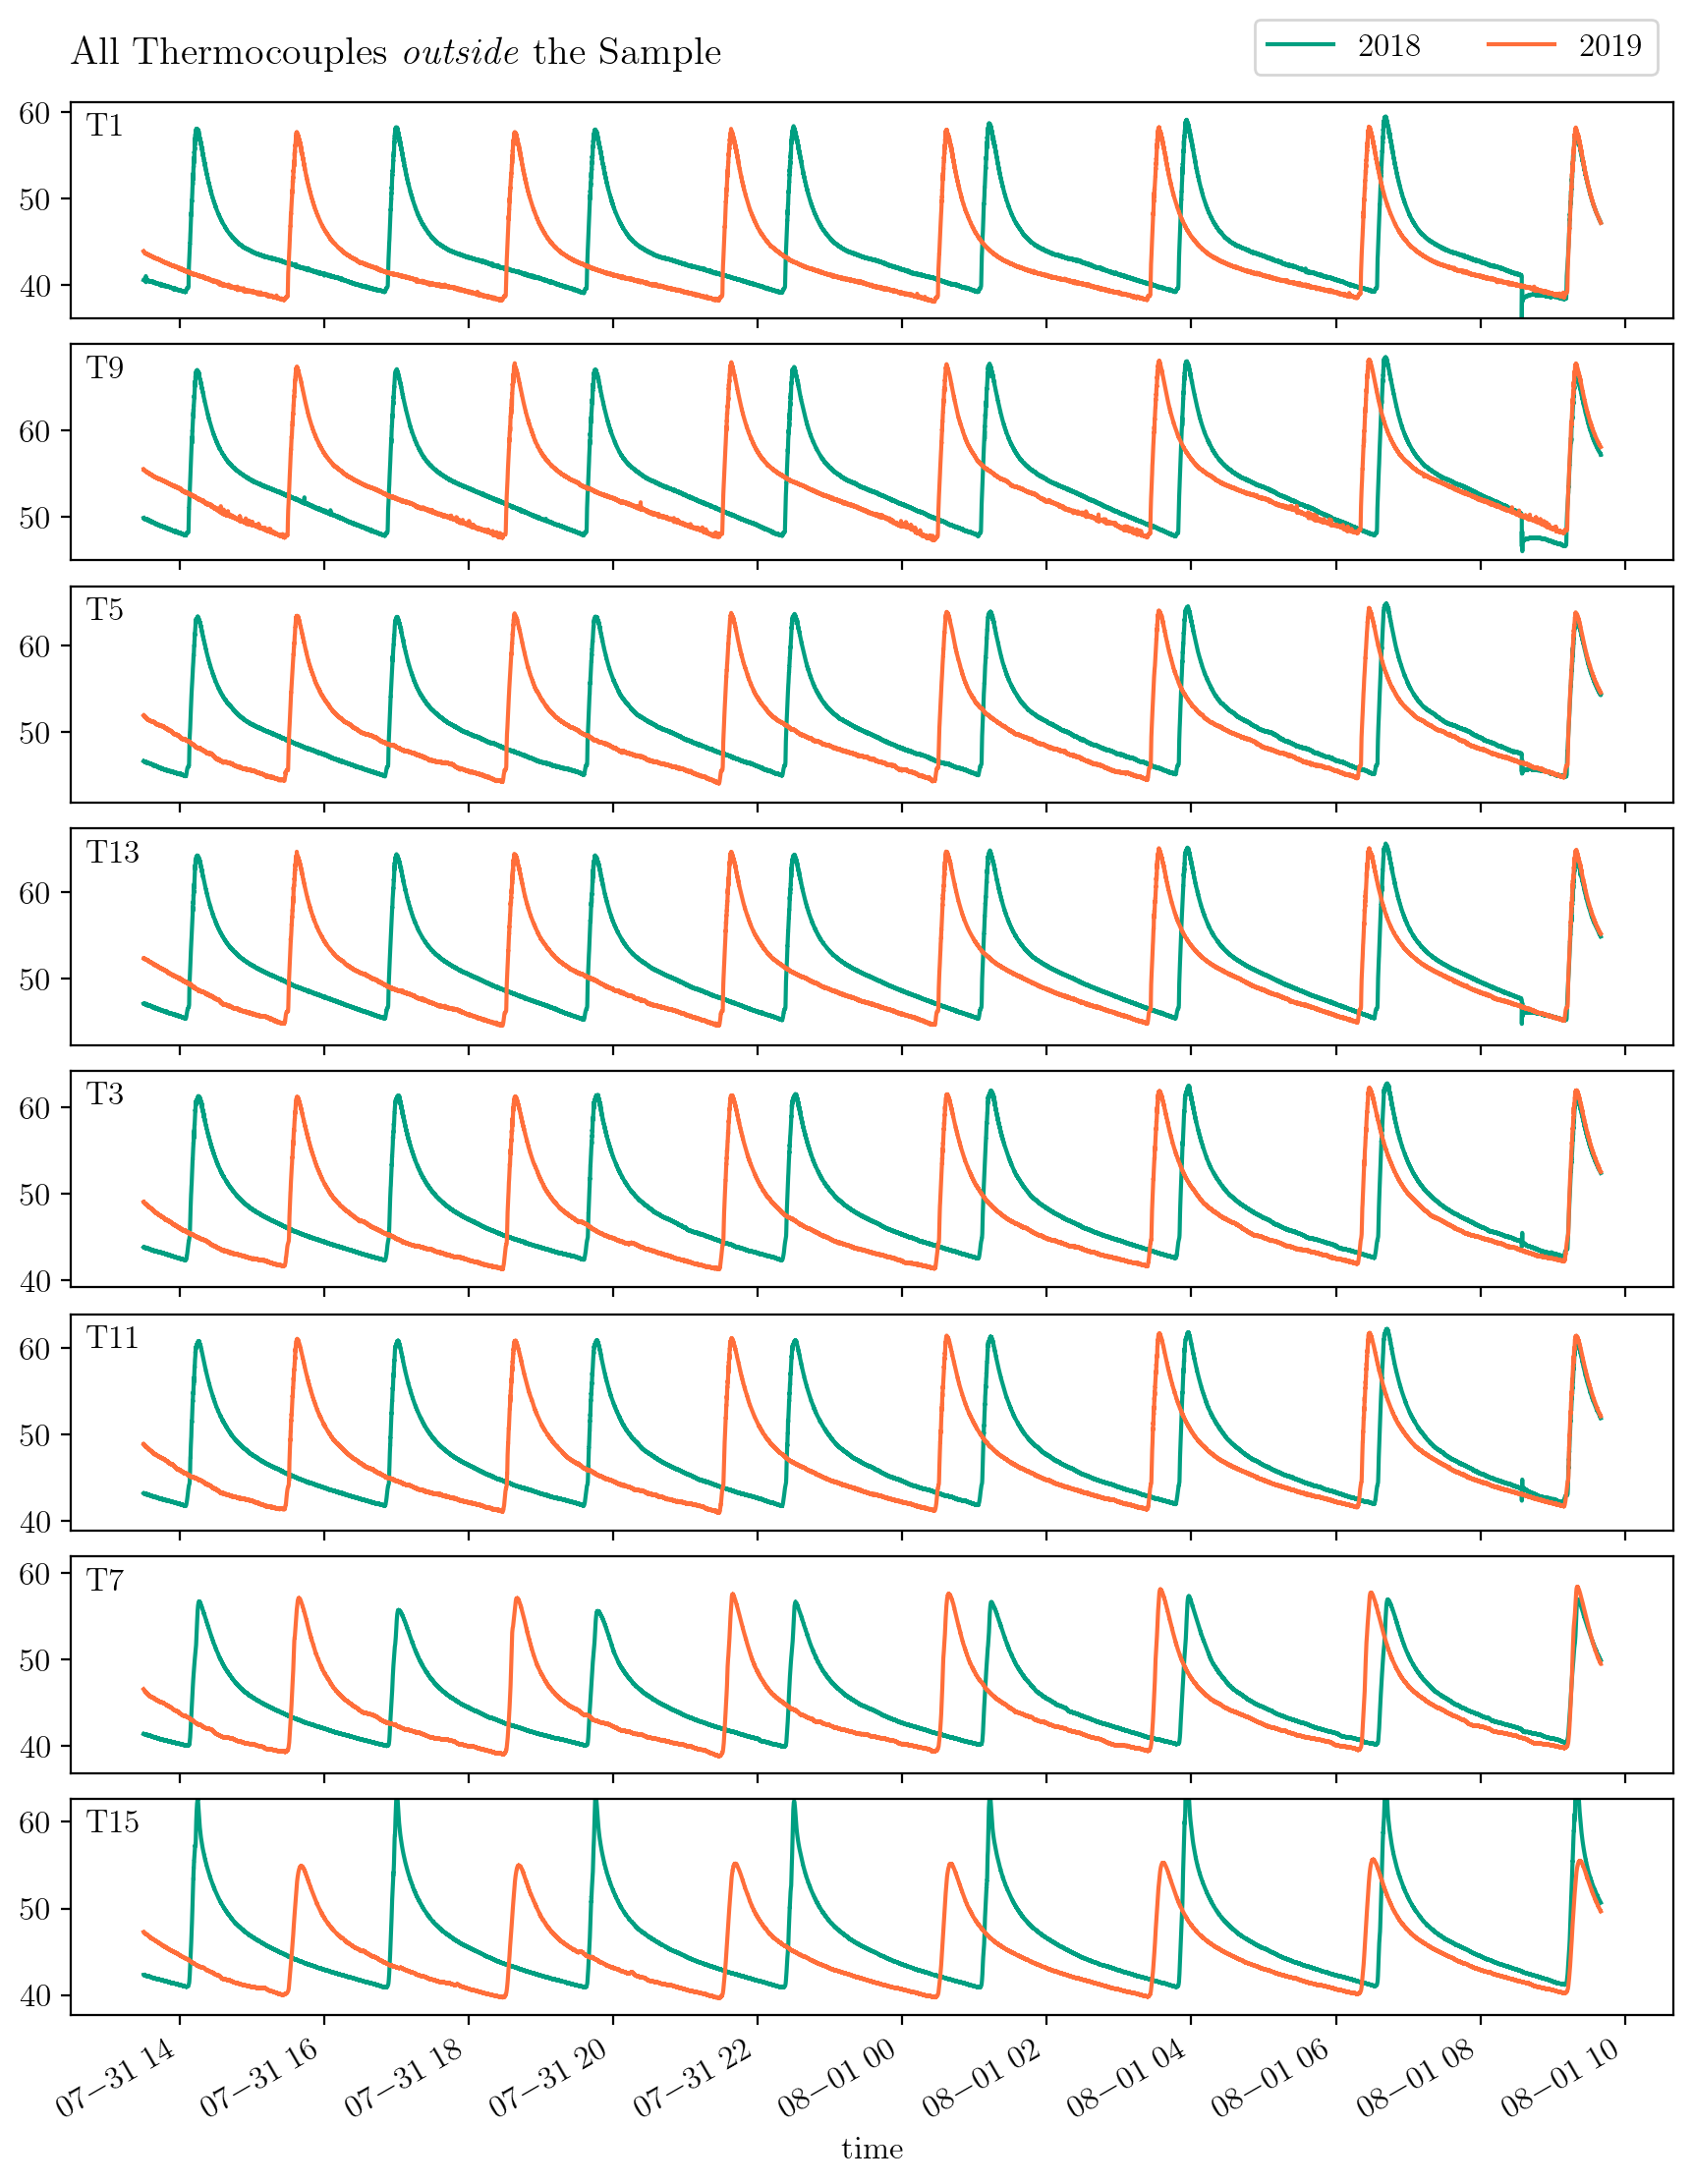

In [28]:
fig, axs = plt.subplots(nrows=8, sharex=True, layout='constrained')

for ax, col in zip(axs, cols2):
    ax.text(.01, .95, col, ha='left', va='top', color='k', transform=ax.transAxes)
    ax.plot(t18, sel18[col].values, color=pltt[1], label="2018")
    ax.plot(t19, sel19[col].values, color=pltt[3], label="2019")
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    mn = 0.95 * sel19[col].min()
    ax.set(ylim=(mn, mn + 25))
axs[0].legend(ncols=2, loc='lower right', bbox_to_anchor=(1, 1.05))
axs[0].set_title(r"All Thermocouples \textit{outside} the Sample", loc='left', y=1.1)
axs[-1].set(xlabel="time")
fig.set_size_inches(8.5, 11)

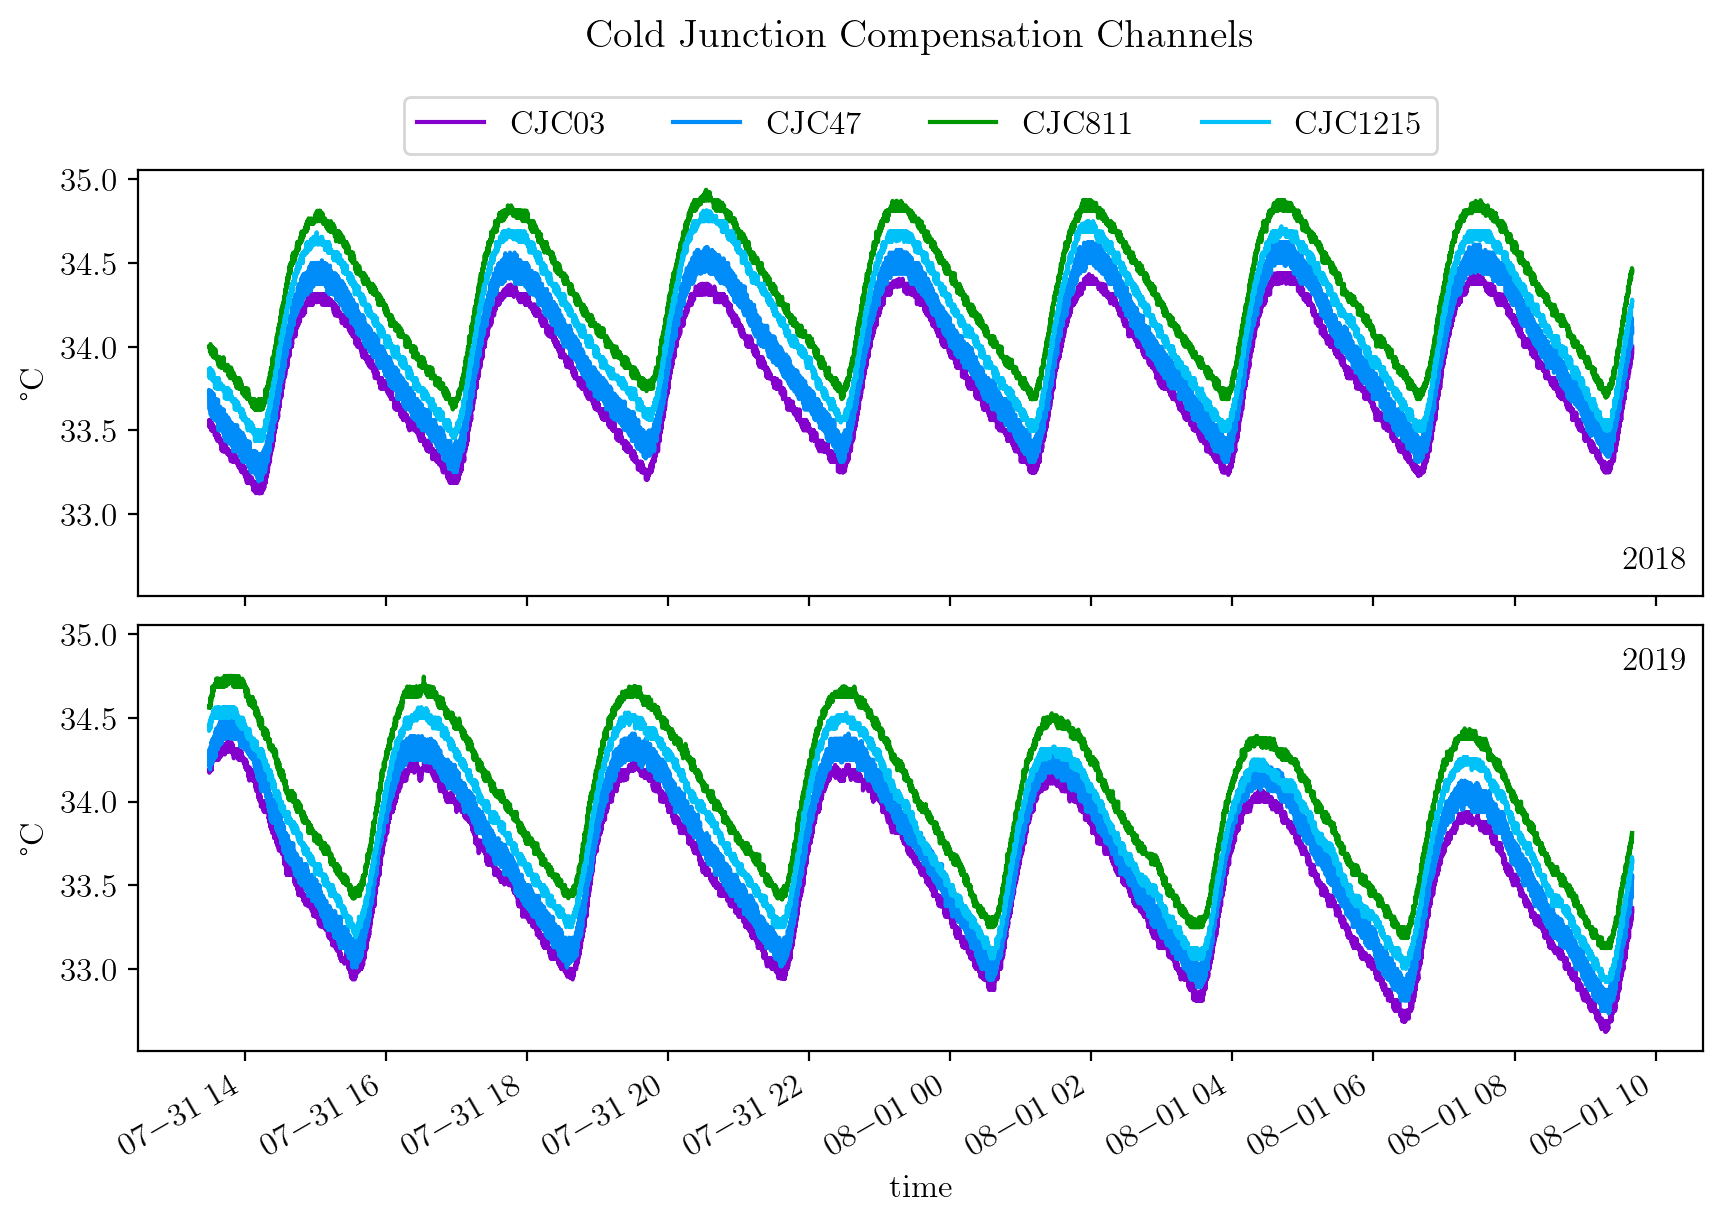

In [29]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, sharex=True, sharey=True, layout='constrained'
)

for i, col in enumerate(selcjc18.columns):
    ax1.plot(t18, selcjc18[col], color=pltt[i + 4], label=col)
    ax2.plot(t19, selcjc19[col], color=pltt[i + 4])
for label in ax2.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax1.text(.99, .05, '2018', transform=ax1.transAxes, ha='right', va='bottom')
ax2.text(.99, .95, '2019', transform=ax2.transAxes, ha='right', va='top')
ax1.set(ylabel=r'°C')
ax1.set_title("Cold Junction Compensation Channels", y=1.25)
ax1.legend(ncols=4, loc='lower center', bbox_to_anchor=(0.5, 1.0))
ax2.set(ylabel='°C', xlabel='time')
fig.set_size_inches(8.5, 6)